<a href="https://colab.research.google.com/github/wanjirumercy-jpg/Mental-Health/blob/main/MENTAL_HEALTH_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Download necessary NLTK data

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

df = pd.read_csv('/content/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


Dropping Irrelevant Columns

In [ ]:
df.drop(['Unnamed: 0','post_id','user_id'],axis=1,inplace=True)

In [ ]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


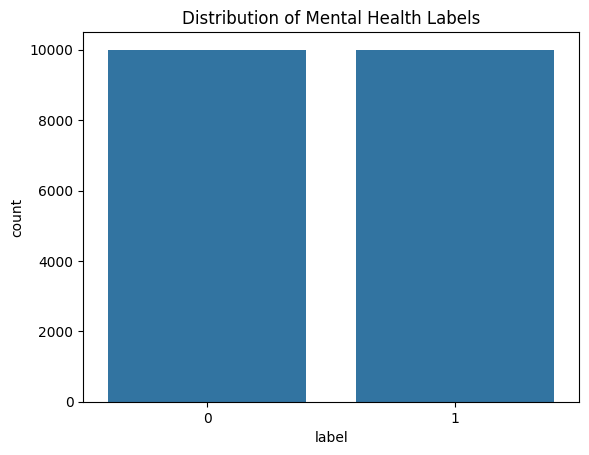

In [ ]:
sns.countplot(x=df['label'])
plt.title('Distribution of Mental Health Labels')
plt.show()

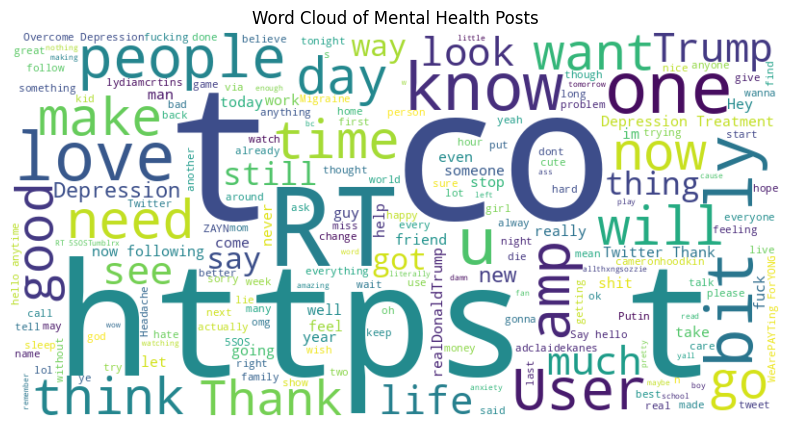

In [ ]:
text = ' '.join(df['post_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Mental Health Posts')
plt.show()

In [ ]:
df.isnull().sum()

,0
post_created,0
post_text,0
followers,0
friends,0
favourites,0
statuses,0
retweets,0
label,0


In [ ]:
df.duplicated().sum()

117

In [ ]:
df.shape

(20000, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(19883, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19883 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_created  19883 non-null  object
 1   post_text     19883 non-null  object
 2   followers     19883 non-null  int64 
 3   friends       19883 non-null  int64 
 4   favourites    19883 non-null  int64 
 5   statuses      19883 non-null  int64 
 6   retweets      19883 non-null  int64 
 7   label         19883 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


Initialize Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@users)
    text = re.sub(r'\brt\b', '', text)  # Remove retweet indicators
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return ' '.join(words)

In [ ]:
df['cleaned_text'] = df['post_text'].apply(preprocess_text)

In [ ]:
df[['post_text', 'cleaned_text']].head()

,post_text,cleaned_text
0,It's just over 2 years since I was diagnosed w...,2 year since diagnosed today taking moment ref...
1,"It's Sunday, I need a break, so I'm planning t...",sunday need break planning spend little time p...
2,Awake but tired. I need to sleep but my brain ...,awake tired need sleep brain idea
3,RT @SewHQ: #Retro bears make perfect gifts and...,bear make perfect gift great beginner get stit...
4,It’s hard to say whether packing lists are mak...,hard say whether packing list making life easi...


In [ ]:
# Apply preprocessing again
df['cleaned_text'] = df['post_text'].apply(preprocess_text)

In [ ]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label,cleaned_text
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,2 year since diagnosed today taking moment ref...
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,sunday need break planning spend little time p...
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,awake tired need sleep brain idea
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,bear make perfect gift great beginner get stit...
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,hard say whether packing list making life easi...


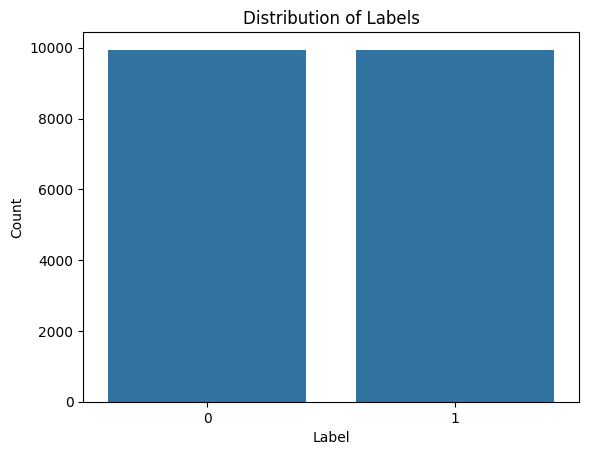

In [ ]:
# Plot label distribution
sns.countplot(x=df['label'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

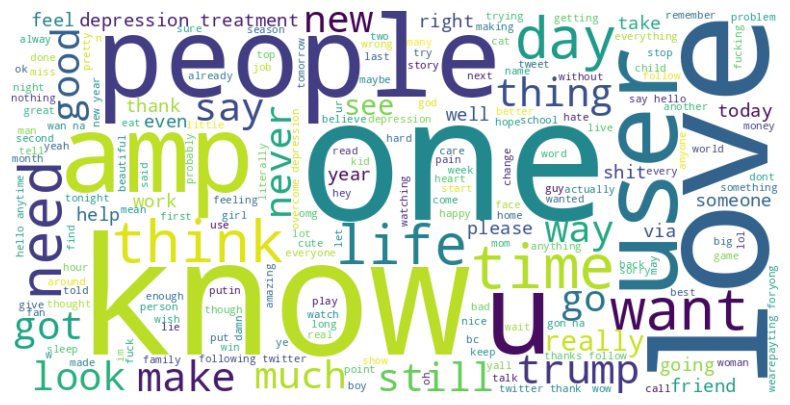

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text
text = ' '.join(df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

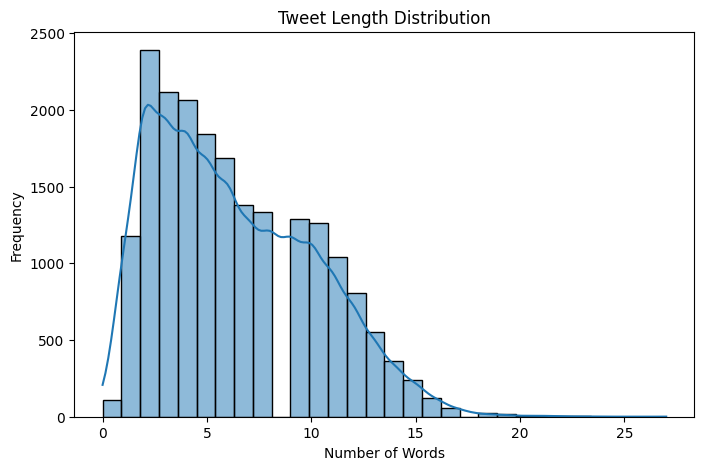

In [ ]:
df['tweet_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot tweet length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X = tfidf.fit_transform(df['cleaned_text'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Display first few rows
print(tfidf_df.head())

    00  000   02   03   08   10  100  1000  100th  101  ...  zimmermann  zink  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0  ...         0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0  ...         0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0  ...         0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0  ...         0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0  ...         0.0   0.0   

   znati  zone  zquad  zsa  zurab  zyl   和夫   松元  
0    0.0   0.0    0.0  0.0    0.0  0.0  0.0  0.0  
1    0.0   0.0    0.0  0.0    0.0  0.0  0.0  0.0  
2    0.0   0.0    0.0  0.0    0.0  0.0  0.0  0.0  
3    0.0   0.0    0.0  0.0    0.0  0.0  0.0  0.0  
4    0.0   0.0    0.0  0.0    0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]


In [ ]:
# Count the occurrences of each class (0 and 1)
label_counts = df['label'].value_counts()

# Display the counts
print(label_counts)

label
1    9944
0    9939
Name: count, dtype: int64


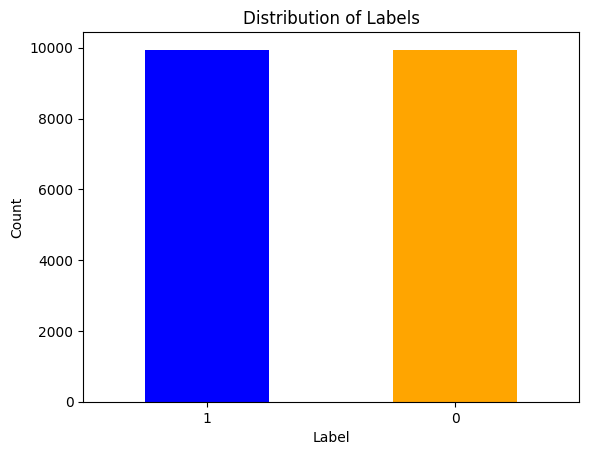

In [ ]:
# Plot the counts
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target labels (y)
X = tfidf_df  # TF-IDF transformed data
y = df['label']  # Assuming 'label' is the column for mental health classification

In [ ]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shape of the training and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (15906, 5000)
Testing set shape: (3977, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

y_pred_log_reg

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7483027407593663
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1974
           1       0.75      0.76      0.75      2003

    accuracy                           0.75      3977
   macro avg       0.75      0.75      0.75      3977
weighted avg       0.75      0.75      0.75      3977



In [ ]:
# Initialize and train the model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=300)

In [ ]:
# Make predictions
y_pred_nn = nn.predict(X_test)
y_pred_nn

NameError: name 'nn' is not defined

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.73447322102087
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1974
           1       0.75      0.71      0.73      2003

    accuracy                           0.73      3977
   macro avg       0.73      0.73      0.73      3977
weighted avg       0.74      0.73      0.73      3977



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7299471963791803
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1974
           1       0.74      0.72      0.73      2003

    accuracy                           0.73      3977
   macro avg       0.73      0.73      0.73      3977
weighted avg       0.73      0.73      0.73      3977



In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions
y_pred_svm = svm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_svm

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

In [ ]:
# Neural Network
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

In [ ]:
# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
# SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
